# Fragment-Lead Pairs: A first look

In [1]:
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent4


In [138]:
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import mols2grid

from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator
import useful_rdkit_utils as uru
from rdkit import DataStructs

sns.set(rc = {'figure.figsize':(15,8)})

In [3]:
fragment_lead_pairs = pd.read_csv('data/fragment_lead_pairs.csv')

In [4]:
fragment_lead_pairs

,Year,Table_Entry,Fragment,Lead
0,2022,1,Nc1cc(c[nH]c1=O)C(F)(F)F,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1
1,2022,2,CN1C[C@@H](O)[C@H](C1=O)c2ccc(C)cc2,COc1ccc(CN2C[C@H](O)[C@](CCC(C)C)(C2=O)c3ccc(c...
2,2022,3,Fc1cncc(c1)N2C(=O)N[C@@H](Cc3ccccc3)C2=O,Clc1ccccc1C2CC3(C2)NC(=O)N(C3=O)c4cncc5ccccc45
3,2022,4,c1ccc(cc1)c2ccccc2c3nnn[nH]3,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N
4,2022,5,CN(C)C(=O)C(N)Cc1ccc(F)cc1,Clc1ccc(cc1)[C@H]2CN[C@H](C2)C(=O)N3CCN(CC3)c4...
...,...,...,...,...
162,2016,23,CC1Cn2c(cc3cccc(S1)c23)C(=O)O,Cc1cc(OCCCc2c(C(=O)O)n3CCCc4c(Cl)ccc2c43)cc(C)...
163,2016,24,COC(=O)[C@@H](N)Cc1c[nH]c2ccccc12,Clc1sc(cc1Br)S(=O)(=O)NCCc2c[nH]c3ccccc23
164,2016,25,OC(=O)c1cc(c2ccccc2)n(n1)c3ccccc3,OC(=O)c1ccc(o1)c2ccc(Cl)c(c2)C(=S)NCc3ccc(cc3)...
165,2016,26,O=C(CN1CCNCC1)N2CCCCC2,COC[C@H]1CN[C@H](C)CN1CC(=O)N2CC(C)(C)c3cnc(Cc...


In [263]:
index = 3

initial_fragment_smiles, lead_smiles = fragment_lead_pairs['Fragment'][index], fragment_lead_pairs['Lead'][index]

In [264]:
os.environ["SMILES"] = initial_fragment_smiles
command = f'python3 generate_analogs.py --toml_file sampling.toml --smiles \'{initial_fragment_smiles}\' --dock'
# subprocess.run(command, check=True)

In [265]:
initial_fragment_smiles, lead_smiles

('c1ccc(cc1)c2ccccc2c3nnn[nH]3', 'Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N')

#### Run the following command:

`python3 generate_analogs.py --input_frag 'Nc1cc(c[nH]c1=O)C(F)(F)F' --lead 'N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1'`

Note: Change SMILES string arguments as needed

In [266]:
analogs = pd.read_csv('data/dataframe.csv')

analogs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [267]:
analogs

,SMILES,Input_SMILES,Tanimoto,Prior
0,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N,c1ccc(cc1)c2ccccc2c3nnn[nH]3,NaN,NaN
1,c1ccc(-c2nnn[nH]2)c(-c2ccncc2)c1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.700000,similarity
2,Fc1ccc(-c2nnn[nH]2)c(-c2ccccc2)c1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.704918,scaffold
3,Clc1ccc(-c2ccccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.677419,scaffold_generic
4,O=[N+]([O-])c1ccccc1-c1ccccc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.516129,mmp
...,...,...,...,...
2570,FC(F)(F)c1cccc(-c2nnn[nH]2)c1-c1ccccc1Cl,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.540541,medium_similarity
2571,CCOc1cccc(-c2ccccc2-c2nnn[nH]2)c1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.512195,scaffold_generic
2572,O=C(O)Cc1nnc(-c2ccccc2-c2ccccc2)o1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.541667,medium_similarity
2573,Cc1cc(-c2ccccc2-c2nnn[nH]2)cc(C)c1C,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.582090,medium_similarity


In [268]:
print(lead_smiles in analogs['SMILES'][1:].to_list())

False


## Visualizing the Distribution

In [269]:
smiles = analogs['SMILES'][1:].to_numpy()

mols = [Chem.MolFromSmiles(smile) for smile in smiles]

initial_fragment = Chem.MolFromSmiles(initial_fragment_smiles)
lead_mol = Chem.MolFromSmiles(lead_smiles)

In [270]:
fpgen = AllChem.GetMorganGenerator()

fingerprints = np.array([fpgen.GetFingerprint(mol).ToList() for mol in mols])

initial_fragment_fp = np.array([fpgen.GetFingerprint(initial_fragment)])
lead_fp = np.array([fpgen.GetFingerprint(lead_mol).ToList()])

X = np.vstack((initial_fragment_fp, fingerprints, lead_fp))

In [271]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [272]:
pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

In [273]:
pca.explained_variance_ratio_

array([0.01063465, 0.00626505, 0.00591877])

In [274]:
analogs['PC1'], analogs['PC2'], analogs['PC3'] = pca_fps.T[0][1:], pca_fps.T[1][1:], pca_fps.T[2][1:]

In [275]:
medium_sim = analogs.query('Prior == ["medium_similarity"]').copy()
high_sim = analogs.query('Prior == ["high"]').copy()
sim = analogs.query('Prior == ["similarity"]').copy()
mmp = analogs.query('Prior == ["mmp"]').copy()
scaffold = analogs.query('Prior == ["scaffold"]').copy()
scaffold_generic = analogs.query('Prior == ["scaffold_generic"]').copy()

In [276]:
len(medium_sim), len(high_sim), len(sim), len(mmp), len(scaffold), len(scaffold_generic)

(474, 0, 448, 430, 413, 466)

Text(0.5, 0.98, 'Distribution of Generated Molecules from Fragment-Lead Pair')

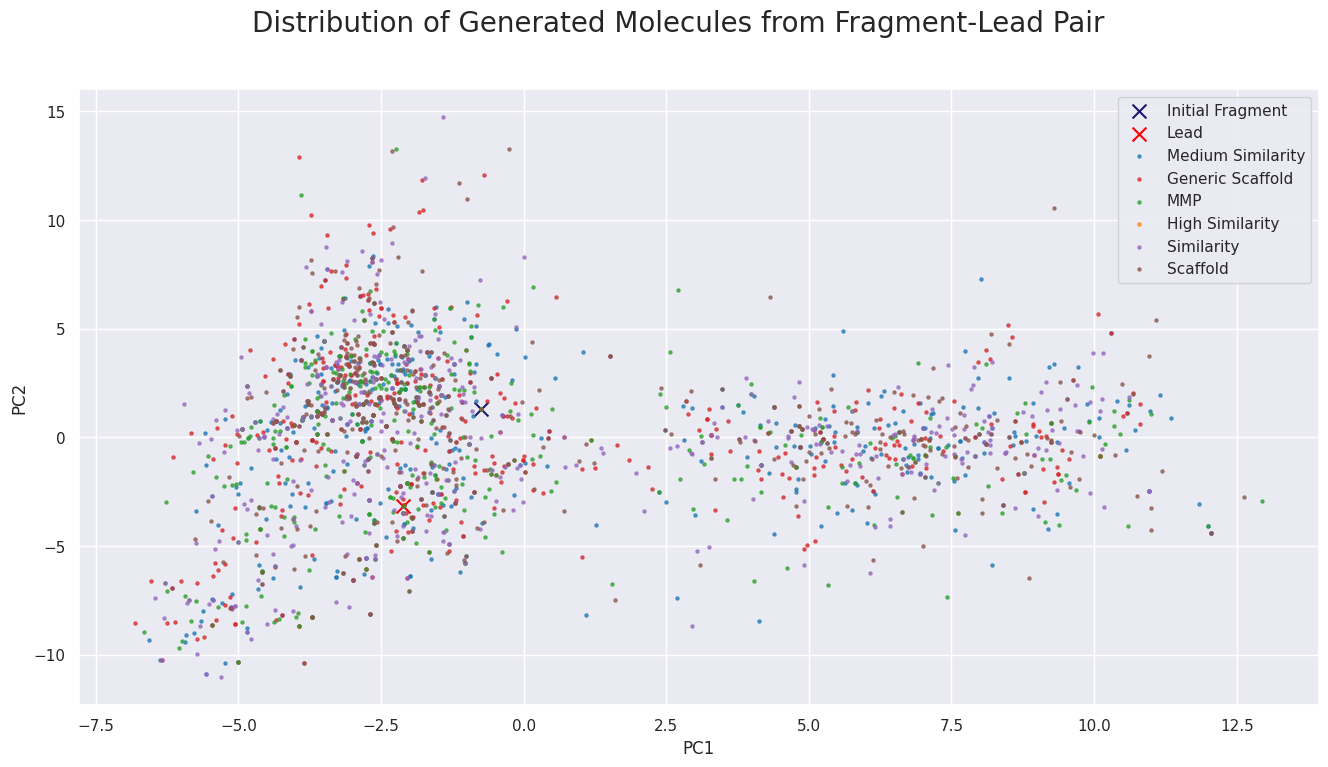

In [277]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))

ax.scatter(pca_fps.T[0][0], pca_fps.T[1][0], s=100, c='midnightblue', marker='x', label='Initial Fragment')
ax.scatter(pca_fps.T[0][-1], pca_fps.T[1][-1], s=100, c='red', marker='x', label='Lead')

ax.scatter(medium_sim['PC1'], medium_sim['PC2'], s=5, c='tab:blue', label='Medium Similarity', alpha=.7)
ax.scatter(scaffold_generic['PC1'], scaffold_generic['PC2'], s=5, c='tab:red', label='Generic Scaffold', alpha=.7)
ax.scatter(mmp['PC1'], mmp['PC2'], s=5, c='tab:green', label='MMP', alpha=.7)


ax.scatter(high_sim['PC1'], high_sim['PC2'], s=5, c='tab:orange', label='High Similarity', alpha=.7)
ax.scatter(sim['PC1'], sim['PC2'], s=5, c='tab:purple', label='Similarity', alpha=.7)
ax.scatter(scaffold['PC1'], scaffold['PC2'], s=5, c='tab:brown', label='Scaffold', alpha=.7)



handles, labels = ax.get_legend_handles_labels()
# handles[0] = plt.Line2D([], [], marker='.', color='limegreen', linestyle='None', markersize=5, alpha=1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


ax.legend(handles, labels)

fig.suptitle('Distribution of Generated Molecules from Fragment-Lead Pair', fontsize=20)

# subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'
# ax.set_title(subtitle, fontsize=10, y=1.02);

From this plot, it seems that the model is not generating analogs in the same chemical space as the lead molecule.

## Assessing Binding Affinity

In [278]:
# lead_docking_score = analogs.iloc[0]['Docking score']

In [279]:
# fig = plt.figure(figsize =(10, 7))

# plt.boxplot(analogs['Docking score'], vert=False, patch_artist=True)

# plt.plot(lead_docking_score, 1, 'x', markersize=10, color='red')

# plt.xlabel('Docking Score')

# ax = plt.gca()
# ax.set(yticklabels=[])

# title = f'Distribution of docking scores from fragment-lead pair'
# subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

# fig.suptitle(title)
# plt.title(subtitle, fontsize=10);

## Investigating Tanimoto Similarity

In [280]:
def tanimoto_similarity(smi_1, smi_2, use_counts=True):
    fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048,countSimulation=True)
    mol_1 = Chem.MolFromSmiles(smi_1)
    mol_2 = Chem.MolFromSmiles(smi_2)
    if use_counts:
        fp_1 = rdFingerprintGenerator.GetCountFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetCountFPs([mol_2])[0]
    else:
        fp_1 = rdFingerprintGenerator.GetFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetFPs([mol_2])[0]
    return DataStructs.TanimotoSimilarity(fp_1, fp_2)

In [281]:
tanimoto_similarity(initial_fragment_smiles, lead_smiles)

0.4125

In [282]:
similarities_to_lead = [tanimoto_similarity(analog, lead_smiles, True) for analog in analogs['SMILES'].values]

In [283]:
analogs['sim_to_lead'] = similarities_to_lead

In [284]:
analogs.sort_values('sim_to_lead', ascending=False, inplace=True)

analogs

,SMILES,Input_SMILES,Tanimoto,Prior,PC1,PC2,PC3,sim_to_lead
0,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N,c1ccc(cc1)c2ccccc2c3nnn[nH]3,NaN,NaN,-2.276657,1.576657,0.954474,1.000000
1785,Cc1ccc(-c2c(N)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.358025,scaffold,5.811451,0.137473,-2.856745,0.671429
1776,Cc1ccc(-c2c(F)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.460526,scaffold,-3.109210,3.740383,2.272840,0.647887
726,Cc1ccc(-c2c(F)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.453125,scaffold_generic,-2.112842,-4.641326,-2.739032,0.647887
575,Cc1cccc(-c2nnn[nH]2)c1-c1ccccc1S(N)(=O)=O,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.500000,scaffold,6.033500,-3.200565,-2.325472,0.631579
...,...,...,...,...,...,...,...,...
1368,c1ccc(-c2nnnn2C2CCCCC2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.376623,scaffold_generic,-3.461332,3.257272,3.277831,0.177083
1332,c1ccc(C2=NOC(c3ccccc3)C2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.704918,mmp,-3.718078,2.885971,3.312375,0.177083
1240,OCc1nnn[nH]1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.704918,mmp,-1.943323,1.636664,1.126794,0.171429
2224,FC(F)(F)c1nnc(-c2ccccc2C2CCCCC2)o1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.507246,scaffold_generic,8.491270,5.146148,-7.013006,0.161905


In [285]:
analogs['sim_to_lead'].mean()

0.36668830504063693

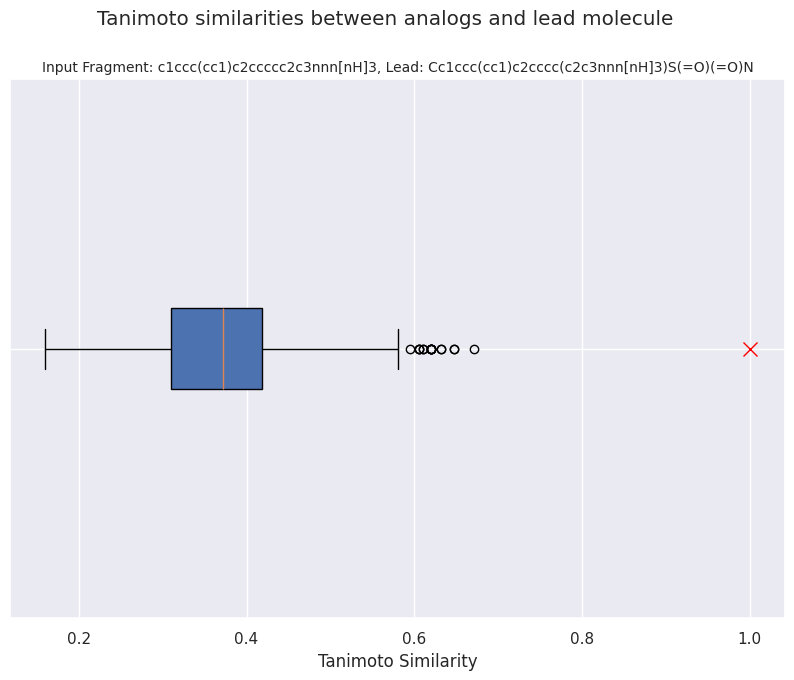

In [286]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(analogs['sim_to_lead'][1:], vert=False, patch_artist=True)

plt.plot(analogs['sim_to_lead'][0], 1, 'x', markersize=10, color='red')

plt.xlabel('Tanimoto Similarity')

ax = plt.gca()
ax.set(yticklabels=[])

title = f'Tanimoto similarities between analogs and lead molecule'
subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

fig.suptitle(title)
plt.title(subtitle, fontsize=10);

### Breaking it down by prior

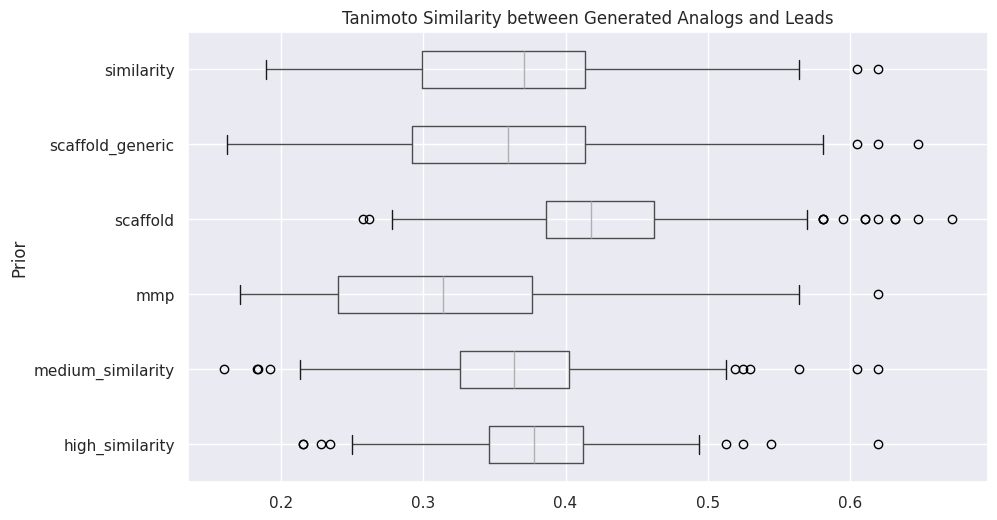

In [287]:
fig, ax = plt.subplots(figsize=(10, 6))

params = {'vert' : 0}

analogs[1:].boxplot(column='sim_to_lead', by='Prior', ax=ax, **params)

fig.suptitle('')
ax.set_title('Tanimoto Similarity between Generated Analogs and Leads');

## Visualizing the Molecules

In [288]:
analogs.sort_values(['sim_to_lead'], ascending=False)

,SMILES,Input_SMILES,Tanimoto,Prior,PC1,PC2,PC3,sim_to_lead
0,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N,c1ccc(cc1)c2ccccc2c3nnn[nH]3,NaN,NaN,-2.276657,1.576657,0.954474,1.000000
1785,Cc1ccc(-c2c(N)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.358025,scaffold,5.811451,0.137473,-2.856745,0.671429
1776,Cc1ccc(-c2c(F)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.460526,scaffold,-3.109210,3.740383,2.272840,0.647887
726,Cc1ccc(-c2c(F)cccc2-c2nnn[nH]2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.453125,scaffold_generic,-2.112842,-4.641326,-2.739032,0.647887
575,Cc1cccc(-c2nnn[nH]2)c1-c1ccccc1S(N)(=O)=O,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.500000,scaffold,6.033500,-3.200565,-2.325472,0.631579
...,...,...,...,...,...,...,...,...
1368,c1ccc(-c2nnnn2C2CCCCC2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.376623,scaffold_generic,-3.461332,3.257272,3.277831,0.177083
1332,c1ccc(C2=NOC(c3ccccc3)C2)cc1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.704918,mmp,-3.718078,2.885971,3.312375,0.177083
1240,OCc1nnn[nH]1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.704918,mmp,-1.943323,1.636664,1.126794,0.171429
2224,FC(F)(F)c1nnc(-c2ccccc2C2CCCCC2)o1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.507246,scaffold_generic,8.491270,5.146148,-7.013006,0.161905


In [289]:
best_analog, avg_analog = analogs.iloc[1], analogs.iloc[900]

In [290]:
best_analog, avg_analog

(SMILES          Cc1ccc(-c2c(N)cccc2-c2nnn[nH]2)cc1
 Input_SMILES        c1ccc(-c2ccccc2-c2nnn[nH]2)cc1
 Tanimoto                                  0.358025
 Prior                                     scaffold
 PC1                                       5.811451
 PC2                                       0.137473
 PC3                                      -2.856745
 sim_to_lead                               0.671429
 Name: 1785, dtype: object,
 SMILES          COc1ccc(OC)c(-c2nnn[nH]2)c1-c1ccccc1
 Input_SMILES          c1ccc(-c2ccccc2-c2nnn[nH]2)cc1
 Tanimoto                                    0.448718
 Prior                                       scaffold
 PC1                                        -4.777382
 PC2                                         1.856766
 PC3                                        -0.034466
 sim_to_lead                                 0.397727
 Name: 1657, dtype: object)

In [291]:
smiles = [initial_fragment_smiles, lead_smiles, best_analog['SMILES'], avg_analog['SMILES']]

In [292]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [293]:
tooltip = ['SMILES']
style = {'SMILES' : smiles}

mols2grid.display(mols,
                  size=(400, 250))

MolGridWidget()